Kiki Chandra & Zoher Ghadyali

Data Science Spring 2016

CYOA Project

## Data Exploration

The first part of this project involved doing some basic data exploration through visualization and manipulation in order to become more familiar with the dataset and get a better idea of what we can do with it. We chose to work with the Rotten Tomatoes dataset and explore sentiment analysis. Below we display the dataset so that we have an idea of what we are working with. Each initial review on Rotten Tomatoes has gone through the Stanford phrase parser and the result of that parsing consists of the entire sentence, phrases within the sentence, and single words contained in the sentence.

In [3]:
#Import needed libraries and get data
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import string
from collections import Counter

data = pd.read_table('train.tsv')
data["Length"] = data['Phrase'].apply(lambda x: len(x.split()))   #create new column with length of phrase in words
data

/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,PhraseId,SentenceId,Phrase,Sentiment,Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1
5,6,1,of escapades demonstrating the adage that what...,2,12
6,7,1,of,2,1
7,8,1,escapades demonstrating the adage that what is...,2,11
8,9,1,escapades,2,1
9,10,1,demonstrating the adage that what is good for ...,2,10


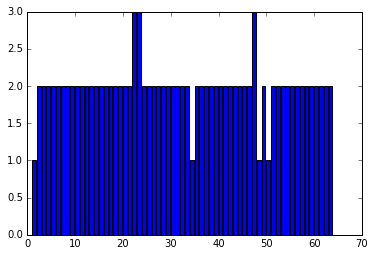

In [3]:
sent1 = data[data.SentenceId == 1]
x = sent1.PhraseId
y = sent1.Sentiment
plt.bar(x,y)
plt.show()

Looking at a plot of the sentiments of each phrase that is part of a sentence, it was immediately clear that the majority of the phrases are neutral, with two or three phrases with extreme sentiments (in either direction) determining if the overall sentence would be neutral, positive, or negative. That is definitely something to keep in mind moving forward. 

So now let's look at all of the train data and determine how many phrases we have of each sentiment. Below we plot a histogram of all the phrases by their sentiment. We also calculate and print out the percentage of the total data that is each sentiment.

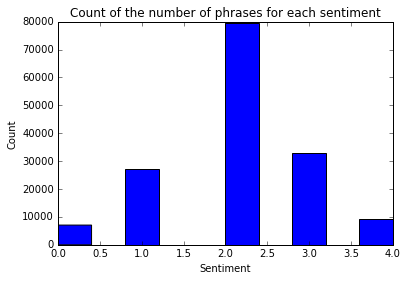

Sentiment:  0 Percentage:  0.0453159041394
Sentiment:  1 Percentage:  0.174759707805
Sentiment:  2 Percentage:  0.50994489299
Sentiment:  3 Percentage:  0.210989363065
Sentiment:  4 Percentage:  0.0589901320005


In [29]:
plt.hist(data.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of phrases for each sentiment')
plt.show()

for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(data[data.Sentiment == i]) / float(len(data))

Below we create a subset of the data that only contains the single words in the data by checking for the presence of spaces in the phrase. We then create the same histogram as above for the number of single words for each sentiment. We see a lot more 2s because most single words do not provide enough context to actually have a positive or negative sentiment, with very few 1s and 3s and even fewer 0s and 4s. Again we print out the percentage of all of the single words that fall within each sentiment.

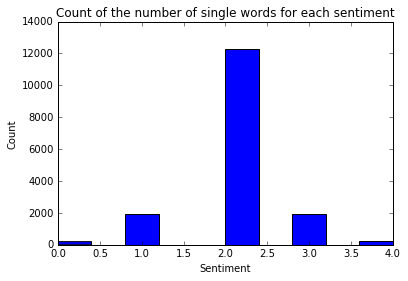

Sentiment:  0 Percentage:  0.0119170044159
Sentiment:  1 Percentage:  0.115842961708
Sentiment:  2 Percentage:  0.742786280322
Sentiment:  3 Percentage:  0.116145423749
Sentiment:  4 Percentage:  0.0133083298046


In [28]:
data["containsSpaces"] = data["Phrase"].apply(lambda x: ' ' in x)
sw = data[data.containsSpaces == False]

plt.hist(sw.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of single words for each sentiment')
plt.show()
for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(sw[sw.Sentiment == i]) / float(len(sw))

Below we again create a subset of the data but this time we are only looking at the complete sentences. We expect to see more variation in the sentiment of the sentences than in the sentiments of the single words. Interestingly, as shown in the histogram below, we have more sentences with sentiments 0, 1, 3, and 4. This is where we started to get the idea that we should have separate models for sentences as opposed to single words and then group all of them together.

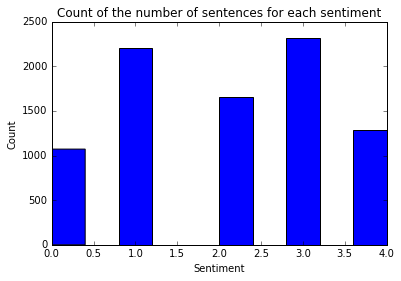

0 0.125688826357
1 0.257943486927
2 0.194043850393
3 0.272130378708
4 0.150193457615


In [4]:
sentences = data.groupby('SentenceId').first().reset_index()
plt.hist(sentences.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of sentences for each sentiment')
plt.show()
for i in range(0, 5):
    print i, len(sentences[sentences.Sentiment == i]) / float(len(sentences))

So in working with this data, Kaggle lets you know that phrases that are repeated are only included once in the data, at the first instance that they appear. What this means is that we don't have any indication of what words are most common among all of the reviews. So we wanted to find these words because they probably have less significance snd can be filtered out. This is very similar to the idf part of the tfidf algorithm.

Below we print out the 25 most common words used in all of the reviews and the number of times they appear in each sentence.

In [17]:
word_dict = {}
regex = re.compile('[%s]' % re.escape(string.punctuation))

for index, row in sentences.iterrows():
    wordList = list(set(regex.sub('', row["Phrase"]).lower().split()))         
    for word in wordList:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
d = Counter(word_dict)
for k, v in d.most_common(25):
     print '%s: %i' % (k, v)

the: 4528
a: 3977
and: 3571
of: 3321
to: 2457
is: 2276
s: 2159
it: 2040
that: 1760
in: 1656
but: 1153
film: 1124
with: 1074
this: 973
movie: 942
for: 927
as: 907
an: 902
its: 825
you: 659
nt: 645
be: 637
on: 600
not: 572
one: 526


We then split the sentences into groups by their sentiment in order to analyze what aspects cause sentences to be given that sentiment:

In [6]:
super_pos = sentences[sentences.Sentiment == 4]
pos = sentences[sentences.Sentiment == 3]
neutral = sentences[sentences.Sentiment == 2]
neg = sentences[sentences.Sentiment == 1]
super_neg = sentences[sentences.Sentiment == 0]


In [ ]:
#warning: long runtime
phrases_sent = []
for index, row in super_pos.iterrows():
    phrase = row['Phrase'].split()
    extreme_sentiments = []
    all_sentiments = []
    neutral_count = 0
    other_count = 0
    words = len(phrase)
    for i in phrase:
        sent = single_words[single_words.Phrase == i]
        try:
            if int(sent.Sentiment) != 2:
                extreme_sentiments.append(int(sent.Sentiment))
                other_count += 1
            else:
                neutral_count += 1
            all_sentiments.append(int(sent.Sentiment))
        except:
            pass
    mean = sum(all_sentiments)/float(words)
    phrases_sent.append((words, extreme_sentiments, other_count, all_sentiments, neutral_count, mean))
phrases_sent


With the above code, we go through each sentence in the super positive (sentiment = 4) to get the sentiments for each word, the overall sentiment, and the counts of extreme sentiments and neutral sentiments. 

In [ ]:
#warning: only compiles if above code has been run
data = []
for i in phrases_sent:
    data.append(i[5])
plt.hist(data, bins=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9])
plt.show()

When we graphed the distribution of word sentiments in a super positive sentence, we found that there was just a slight increase of slightly positive words over neutral words, and almost no negative words. This was interesting because it showed us that when we analyze for sentiment later, often only one or two words are the deciding factors, like we saw with phrases and sentences earlier on. 

Overall, we found several interesting facts to keep in mind through the data exploration phase. It seems to be more valuable to focus on interpreting sentences and phrases separate from single words, because as we discovered a unigram model (interpreting sentence sentiment from single words) was not entirely accurate. The two directions we plan to go in are interpreting sentences and phrases in a different way than single words, and doing research and experimenting to see how single words can be used to better represent a sentence. 